In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cvxpy as cvx
from scipy import stats, misc
import numpy.matlib

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<font size="6"><b>Unsupervised Learning : K-means Clustering</b></font>

Table of Contents
<div id="toc"></div>

# 1. Supervised vs. Unsupervised Learning
- Supervised: building a model from labeled data
- Unsupervised: clustering from unlabeled data

<font size='4'>Supervised Learning</font>


<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/01.bmp", width=400>
        </td>
        <td width = 48%>
            $$ \begin{array}{Icr}
            \{x^{(1)},x^{(2)},\cdots,x^{(m)}\}\\
            \{y^{(1)},y^{(2)},\cdots,y^{(m)}\}
            \end{array} \quad \Rightarrow \quad \text{Classification}$$
        </td>
    </tr>
</table>

<font size='4'>Unsupervised Learning</font>

- Data clustering is an unsupervised learning problem

- Given: 
 - $m$ unlabeled examples $\{x^{(1)},x^{(2)}\cdots, x^{(m)}\}$
 - the number of partitions $k$


- Goal: group the examples into $k$ partitions

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/02.bmp", width = 400>
        </td>
        <td width = 48%>
            $$\{x^{(1)},x^{(2)},\cdots,x^{(m)}\} \quad \Rightarrow \quad \text{Clustering}$$
        </td>
    </tr>
</table>

- the only information clustering uses is the similarity between examples

- clustering groups examples based of their mutual similarities

- A good clustering is one that achieves:
    - high within-cluster similarity
    - low inter-cluster similarity


- it is a "chicken and egg" problem (dilemma)
    - Q: if we knew $c_i$s, how would we determine which points to associate with each cluster center?
    - A: for each point $x^{(i)}$, choose closest $c_i$
    <br><br>    
    - Q: if we knew the cluster memberships, how do we get the centers?
    - A: choose $c_i$ to be the mean of all points in the cluster

# 2. K-means

## 2.1. (Iterative) Algorithm
<br>
<font size='4'><b>1) K-means Clustering Step - Initialization</b></font>

Input:
- $k$: the number of clusters
- Training set $\{x^{(1)},x^{(2)},\cdots,x^{(m)}\}$

Randomly initialized anywhere in $\mathbb{R}^n$
<br>
<img src="./image_files/003.png", width = 600>
<br>

<font size='4'><b>2) K-means Clustering Step - Iteration</b></font>
<br>
<img src="./image_files/004.png", width = 600>

$$
\begin{align*}
c_k &= \{n: k = \arg \min_k \lVert x_n - \mu_k \rVert^2\}\\
\mu_k &= \frac{1}{\lvert c_k \rvert} \sum_{n \in c_k}x_n
\end{align*}
$$

Repeat until convergence (a possible convergence criteria: cluster centers do not change anymore)

<font size='4'><b>3) K-means Clustering Step - Output</b></font>

Output: model
- $c$ (label): index (1 to $k$) of cluster centroid $\{c_1,c_2,\cdots,c_k\}$
- $\mu$ : averages (mean) of points assigned to cluster $\{\mu_1,\mu_2,\cdots,\mu_k\}$

<br>
<img src="./image_files/005.png", width=350>
<br>

In [1]:
%%html
<iframe src="./image_files/11 print.pdf#view=fit", width=700 height=500></iframe>

## 2.3. Summary: K-means Algorithm


$
\,\text{Randomly initialize } k \,\text{cluster centroids } \mu_1,\mu_2,\cdots,\mu_k \in \mathbb{R}^n$

$
\begin{align*}
\text{Repeat}&\{ \\
&\text{for $i=1$ to $m$} \\    
&\quad \text{$c_i$ := index (from 1 to $k$) of cluster centroid closest to $x^{(i)}$} \\     
&\text{for $k=1$ to $k$} \\
&\quad \text{$\mu_k$ := average (mean) of points assigned to cluster $k$} \\
&\}
\end{align*}
$

## 2.4. K-means Optimization Point of View

- $c_i$= index of cluster $(1,2,\cdots,k)$ to which example $x^{(i)}$ is currently assigned
- $\mu_k$= cluster centroid $k$ ($\mu_k \in \mathbb{R}^n$)
- $\mu_{c_i}$= cluster centroid of cluster to which example $x^{(i)}$ has been assigned



- Optimization objective:

$$ J(c_1,\cdots,c_m,\mu_1,\cdots,\mu_k) = \frac{1}{m}\sum\limits_{i=1}^m \lVert x^{(i)}-\mu_{c_i}\rVert^2$$

$$ \min\limits_{c_1,\cdots,c_m, \; \mu_1,\cdots,\mu_k} J(c_1,\cdots,c_m,\mu_1,\cdots,\mu_k)$$

# 3. Matlab code

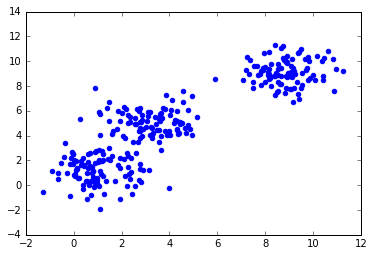

In [3]:
group1 = np.random.multivariate_normal(np.array([1, 1]), np.eye(2), 100) 
group2 = np.random.multivariate_normal(np.array([3, 5]), np.eye(2), 100) 
group3 = np.random.multivariate_normal(np.array([9, 9]), np.eye(2), 100)

data = np.concatenate((group1, group2, group3), 0).transpose()

plt.scatter(data[0, :], data[1, :], color = 'b')
plt.show()

## 3.1. K-means clustering

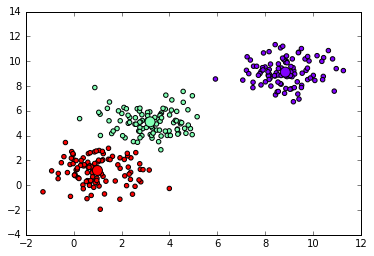

In [4]:
# number of cluster and data
    
ncluster = 3
ndata = 300

#randomly initialize 100 times

C = np.zeros((100, ))
MU = np.zeros((100, ))

for i in range(0,100):
    #select random index
    r = ndata * np.random.rand(3,1)
    r = r.astype(int)[:,0]
    
    mu = data[:, r]
    
    pre_mu = mu
    #run k - means
    for run in range(0,50):
        #cluster assignment
        distance = np.zeros((ncluster, ndata))
        for k in range(0, ncluster):
            distance[k, :] = np.sum((data - np.array([mu[:, k]]).transpose())**2, axis = 0)
                
        c = distance.argmin(axis = 0)
        # move centroid 
       
        for k in range(0, ncluster):
            mu[:, k] = np.mean(data[:, c == k], axis = 1)
            

        if np.sum(np.abs(pre_mu - mu)) < 10 **(-5):
            break;
        else:
            pre_mu = mu
    #compute cost
    cost = 0
    for j in range(0, ncluster):
        cost = cost + np.sum((data[:, c == j] - np.array([mu[:, j]]).transpose())**2)
    
    # find minumun cost and corresponding mu and c
    if i == 0:
        C = c
        J = cost
        MU = mu
    elif cost < J:
        J = cost
        C = c
        MU = mu

plt.scatter(data[0, :], data[1, :], c = C, cmap = 'rainbow')
plt.scatter(MU[0, :], MU[1, :], marker = 'o', s=100, c = np.arange(ncluster), cmap = 'rainbow')        
plt.show()

## K-means: Initialization issues


- k-means is extremely senstitive to cluster center initialization


- Bad initialization can lead to
    - Poor convergence speed
    - Bad overall clustering


- Safeguarding measures:
    - Choose first center as one of the examples, second which is the farthest from the first, third which is the farthest from both, and so on.
    - Try multiple initialization and choose the best result
    

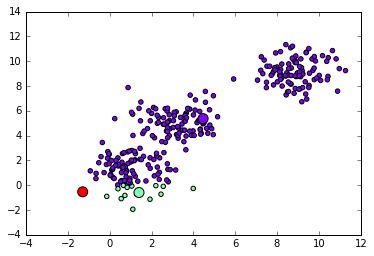

In [5]:
def kmeans_step(frame = 0, ncluster = 3 ):   
    
    ndata = 300

    #select random index
    rng = np.random.RandomState(2)
    center = rng.randn(2, ncluster)
    c = np.zeros(ndata)
    nstep = frame
    for i in range(nstep+1):
        #cluster assignment
        old_center = center

        distance = np.zeros((ncluster, ndata))
        for k in range(0, ncluster):
            distance[k, :] = np.sum((data - np.array([center[:, k]]).transpose())**2, axis = 0)

        c = distance.argmin(axis = 0)
        # move centroid 

        for k in range(0, ncluster):
            center[:, k] = np.mean(data[:, c == k], axis = 1)
        
        nan = np.isnan(center)
        center[nan] = old_center[nan]

    plt.scatter(data[0, :], data[1, :], c = c, cmap = 'rainbow')
    plt.scatter(center[0, :], center[1, :], marker = 'o', s=100, c = np.arange(ncluster), cmap = 'rainbow')

    
from IPython.html.widgets import interact
interact(kmeans_step, frame=[0, 40], ncluster = [1, 6])

Matlab embedded `kmeans` function

`help kmeans`

```octave
KMEANS K-means clustering.
    IDX = KMEANS(X, K) partitions the points in the N-by-P data matrix X
    into K clusters.  This partition minimizes the sum, over all clusters, of
    the within-cluster sums of point-to-cluster-centroid distances.  Rows of X
    correspond to points, columns correspond to variables.  Note: when X is a
    vector, KMEANS treats it as an N-by-1 data matrix, regardless of its
    orientation.  KMEANS returns an N-by-1 vector IDX containing the cluster
    indices of each point.  By default, KMEANS uses squared Euclidean
    distances.
 
    KMEANS treats NaNs as missing data, and ignores any rows of X that
    contain NaNs.
 
    [IDX, C] = KMEANS(X, K) returns the K cluster centroid locations in
    the K-by-P matrix C.
```

## 3.2. Choosing the Number of Clusters

- Idea: when adding another cluster does not give much better modeling of the data

- One way to select $k$ for the K-means algorithm is to try different values of $k$, plot the K-means objective versus $k$, and look at the '<font color='green'>elbow-point</font>' in the plot

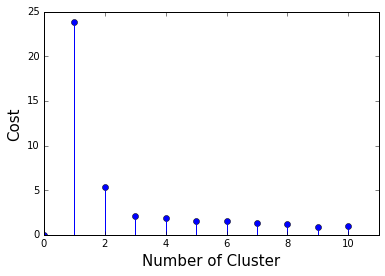

In [6]:
Q = np.zeros((11, ))
for K in range(1, 11):

    # number of cluster and data

    ncluster = K
    ndata = 300

    #randomly initialize 100 times

    C = np.zeros((100, ))
    MU = np.zeros((100, ))

    for i in range(0,10):
        #select random index
        r = ndata * np.random.rand(ncluster,1)
        r = r.astype(int)[:,0]

        mu = data[:, r]

        pre_mu = mu
        #run k - means
        for run in range(0,5):
            #cluster assignment
            distance = np.zeros((ncluster, ndata))
            for k in range(0, ncluster):
                distance[k, :] = np.sum((data - np.array([mu[:, k]]).transpose())**2, axis = 0)

            c = distance.argmin(axis = 0)
            # move centroid 

            for k in range(0, ncluster):
                mu[:, k] = np.mean(data[:, c == k], axis = 1)


            if np.sum(np.abs(pre_mu - mu)) < 10 **(-5):
                break;
            else:
                pre_mu = mu
        #compute cost
        cost = 0
        for j in range(0, ncluster):
            cost = cost + np.sum((data[:, c == j] - np.array([mu[:, j]]).transpose())**2)
        cost = cost/ndata
        # find minumun cost and corresponding mu and c
        if i == 0:
            C = c
            J = cost
            MU = mu
        elif cost < J:
            J = cost
            C = c
            MU = mu
    Q[K] = J
  
plt.stem(Q, 'b')
plt.xlim([0, 11])
plt.xlabel('Number of Cluster',fontsize = 15)
plt.ylabel('Cost',fontsize = 15)
plt.show()

## K-means: Limitations

- Make <font color='red'>hard assignments</font> of points to clusters
    - A point either completely belongs to a cluster or not belongs at all
    - No notion of a <font color='green'>soft assignment</font> (_i.e._, probability of being assigned to each cluster)
    - Gaussian mixture model (we will study later) and Fuzzy K-means allow soft assignments


- Sensitive to outlier examples (such example can affect the mean by a lot)
    - <font color='green'>K-medians</font> algorithm is a more robust alternative for data with outliers


- Works well only for round shaped, and of roughly equal sizes/density cluster


- Does badly if the cluster have non-convex shapes
    - Spectral clustering (we will study later) and Kernelized K-means can be an alternative


- Non-convex/non-round-shaped cluster: standard K-means fails !
<br>
<img src="./image_files/non-convex.png", width = 600>


- Clusters with different densities
<br>
<img src="./image_files/different_densities.png", width = 600>

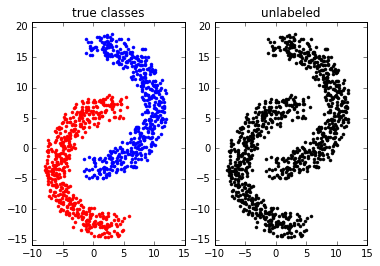

In [7]:
r = 10
x1c = np.array([-2, 5])
x2c = np.array([2, -5])

theta = np.array([np.linspace(-np.pi/2, np.pi/2, 500)]).T
x1 = x1c[0] + r*np.cos(theta)
y1 = x1c[1] + r*np.sin(theta)
x2 = x2c[0] + r*np.cos(theta+np.pi)
y2 = x2c[1] + r*np.sin(theta)

noise = 4

m = np.shape(theta)[0]

x1 = x1 + noise*np.random.rand(m,1)
y1 = y1 + noise*np.random.rand(m,1)
x2 = x2 + noise*np.random.rand(m,1)
y2 = y2 + noise*np.random.rand(m,1)

X1 = np.concatenate((x1, y1), 1)
X2 = np.concatenate((x2, y2), 1)
X = np.concatenate((X1, X2), 0)

plt.subplot(121)
plt.plot(x1, y1, 'b.')
plt.plot(x2, y2, 'r.')
plt.title('true classes')
plt.axis('equal')
plt.subplot(122)
plt.plot(X[:,0], X[:,1], 'k.')
plt.title('unlabeled')
plt.axis('equal')
plt.show()

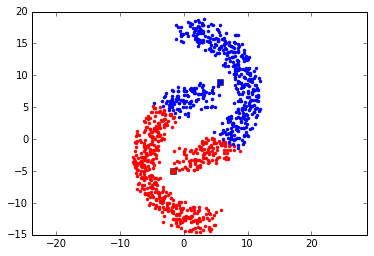

In [8]:
from sklearn.cluster import KMeans
est = KMeans(2)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
mu = est.cluster_centers_
plt.plot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 'r.')
plt.plot(mu[0,0], mu[0,1], 'rs')
plt.plot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 'b.')
plt.plot(mu[1,0], mu[1,1], 'bs')
plt.axis('equal')
plt.show()

We will study the spectural clustering (or partitioning) with a network theory to overcome this k-means' limitation.

# Examples

1) Image compression

- whiteboard handwriting

- Use only 16 colors (color-based, rgb)
    - will be a homework problem
    - source: [ML class](http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex9/ex9.html) by Prof. Andrew Ng at Stanford Univ.

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src="image_files/06.bmp",width="300">
        </td>
        <td width = 48%>
            <img src="image_files/07.bmp",width="300">
        </td>
    </tr>
</table>

2) Image segmentation





In [16]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>